In [13]:
import data.reader as datareader
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import models.model as model
import models.training as trainer
import torch

In [14]:
torch.cuda.empty_cache() 

In [15]:
data_handler = datareader.Data_reader("D:\Documents\\python\\bad_apples\\data\\raw\\")

In [16]:
tl_model = model.transfer_learning_model()
tl_model.make_model()

In [17]:
retrain = 1
if retrain:
    trainer.train_model(tl_model.model, tl_model.criterion, tl_model.optimizer_ft, 
                        tl_model.exp_lr_scheduler, data_handler,num_epochs=3)
    tl_model.save_model(name = "\\model_notebook.pth")
else:
    tl_model.load_model(name = "\\model_notebook.pth")

D:\Programs\Anaconda\envs\pytorch\lib\site-packages\PIL\Image.py:918: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


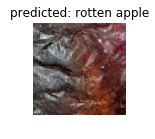

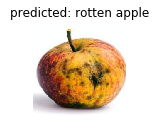

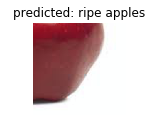

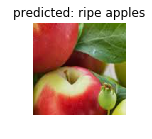

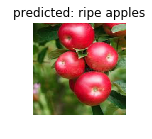

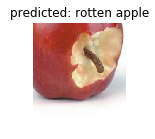

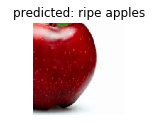

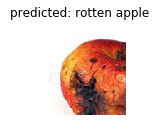

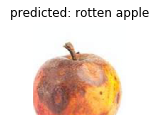

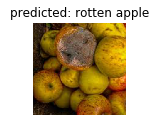

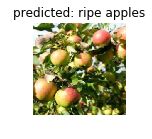

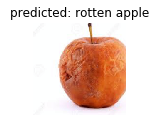

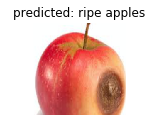

In [18]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated
    
def visualize_model(model, data_handler, num_images=20, device = 'cuda'):
    dataloaders = data_handler.get_data_loader(8)
    was_training = model.training
    model.eval()
    images_so_far = 0
    
    model = model.to(device)
    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['val']):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            

            for j in range(inputs.size()[0]):
                images_so_far += 1
                fig = plt.figure(figsize=(20,20))
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title('predicted: {}'.format(data_handler.data_classes[preds[j]]))
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)
        
visualize_model(tl_model.model,data_handler)
